In [24]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_segmentation = pd.read_csv('segmentation data.csv')
df_segmentation.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [25]:
# Outlier Removal

# from pandas.api.types import is_numeric_dtype 

# def remove_outlier(df_ex):
#   for col_name in list(df_ex.columns):
#     if is_numeric_dtype(df_ex[col_name]):
#       q1 = df_ex[col_name].quantile(0.25)
#       q3 = df_ex[col_name].quantile(0.75)

#       iqr = q3-q1
#       batas_atas = q3+(iqr*1.5)
#       batas_bawah = q1-(iqr*1.5)

#       df_out = df_ex.loc[(df_ex[col_name]>=batas_bawah) & (df_ex[col_name]<=batas_atas)]
#   return df_out 

# df_expenses_clean = remove_outlier(df_segmentation)
# print("Jumlah baris DataFrame sebelum remove outlier", df_segmentation.shape[0])
# print("Jumlah baris DataFrame setelah remove outlier", df_expenses_clean.shape[0])

In [26]:
X_all = df_segmentation.drop(columns=['ID'], axis=1)

X_all.rename(columns={'Sex':'sex', 'Marital Status':'marital_status', 'Age':'age', 'Education':'education', 'Income':'income', 'Occupation':'occupation', 'Settlement size':'settlement_size'}, inplace=True)

print(X_all)

      sex  Marital status  age  education  income  occupation  settlement_size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]


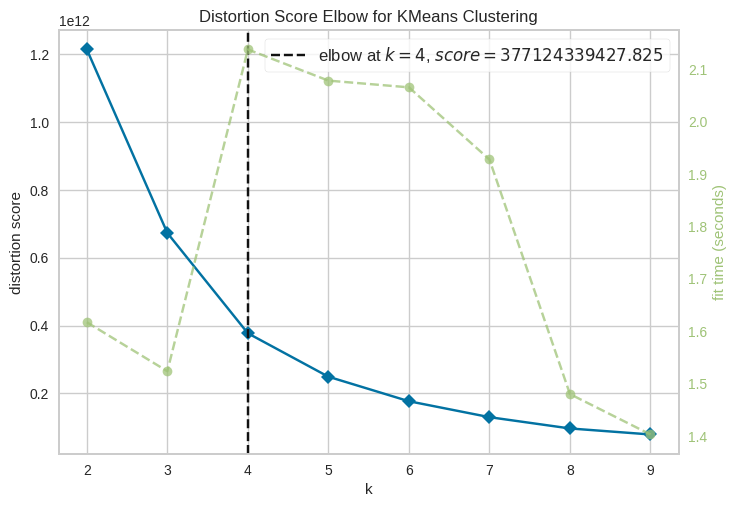

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=0)
vis = KElbowVisualizer(kMeansC, k=(2,10))
vis.fit(X_all)

vis.show()

Silhouette Score K-Means for  2  clusters:  0.5834469001696239
Silhouette Score K-Means for  3  clusters:  0.5116316289724545
Silhouette Score K-Means for  4  clusters:  0.5429921618470235
Silhouette Score K-Means for  5  clusters:  0.5401417522540799
Silhouette Score K-Means for  6  clusters:  0.5425707110489085
Silhouette Score K-Means for  7  clusters:  0.5345525645289237
Silhouette Score K-Means for  8  clusters:  0.5405794625652431
Silhouette Score K-Means for  9  clusters:  0.5332066956454052
Silhouette Score K-Means for  10  clusters:  0.5358111062846861


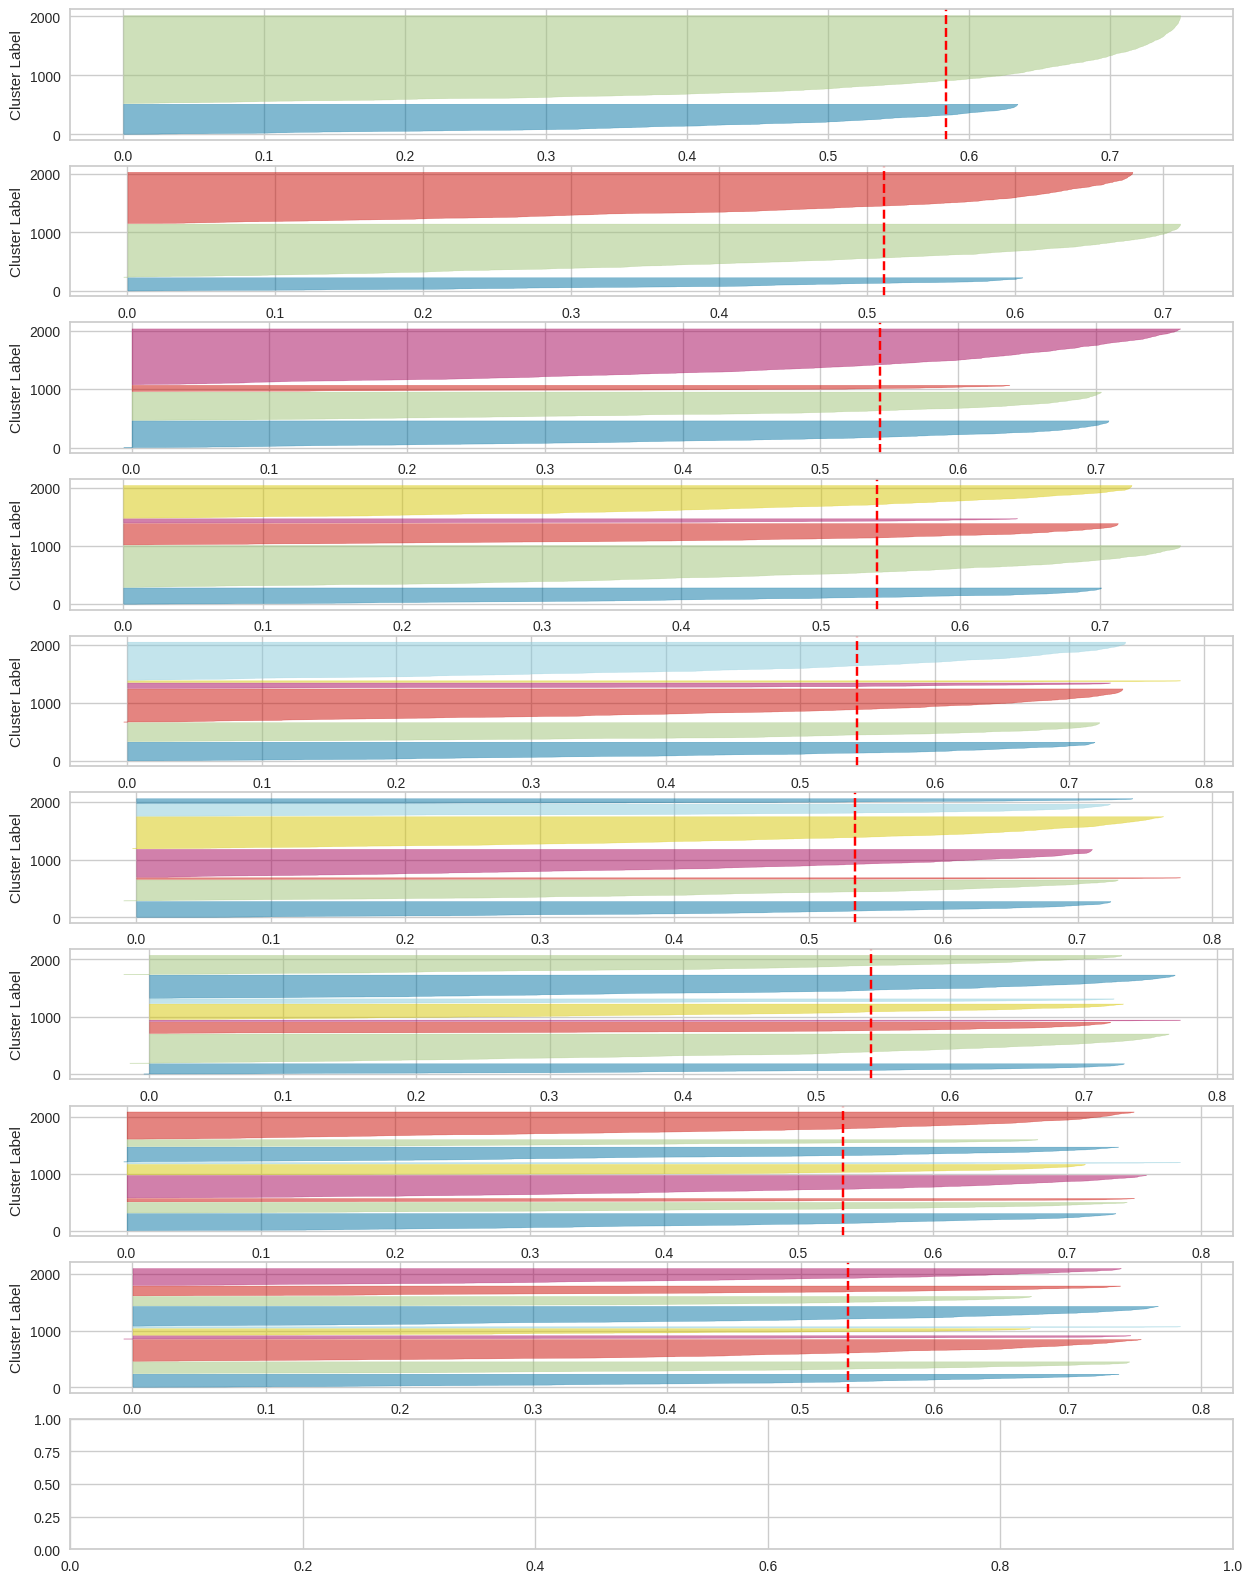

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(10, 1, figsize=(15,20))
for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
    KM_clusters = kMeansC.fit_predict(X_all)
    print("Silhouette Score K-Means for ", k, " clusters: ", silhouette_score(X_all, KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(X_all)
    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster Label")

In [29]:
# K-Means
# Cluster = 4
# Dua digit terakhir NPM = 07

KMEANS = KMeans(n_clusters=4, random_state=7)
KM_clusters = KMEANS.fit_predict(X_all)

In [30]:
print(X_all)

      sex  Marital status  age  education  income  occupation  settlement_size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]


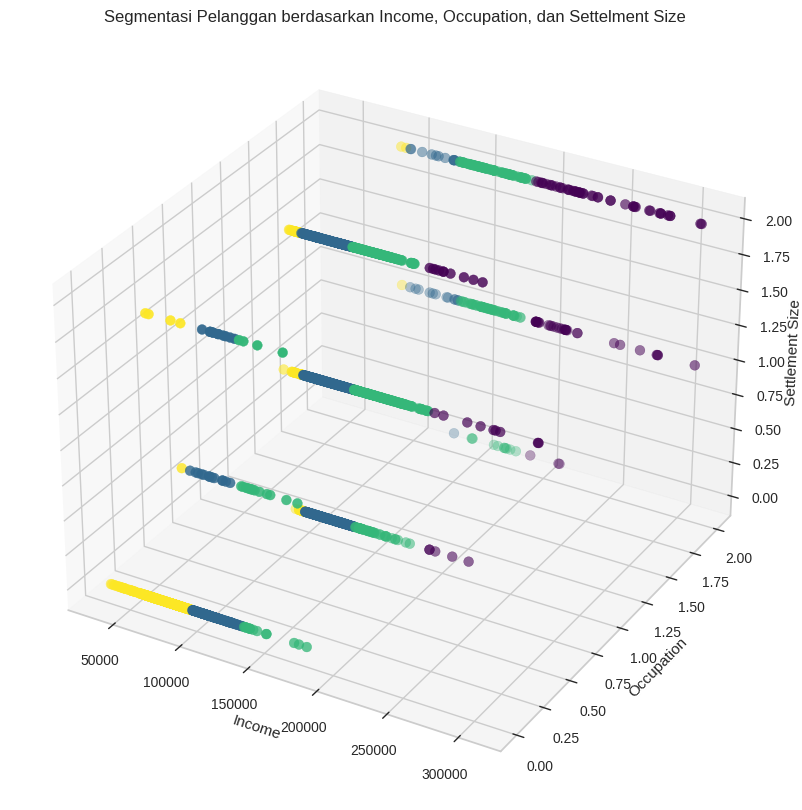

Silhouette Score K-Means: 0.543


In [31]:
import matplotlib.cm as cm

fig3d = plt.figure(figsize=(10,10))
ax = fig3d.add_subplot(111, projection='3d')
ax.scatter(X_all['income'], X_all['occupation'], X_all['settlement_size'], cmap='viridis', c=KM_clusters, s=50)

plt.title('Segmentasi Pelanggan berdasarkan Income, Occupation, dan Settelment Size')
ax.set_xlabel('Income')
ax.set_ylabel('Occupation')
ax.set_zlabel('Settlement Size')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(X_all, KM_clusters))

In [32]:
# Agglomerative Clustering

AGG = AgglomerativeClustering(n_clusters=4, linkage='single')
AGG_clusters = AGG.fit_predict(X_all)

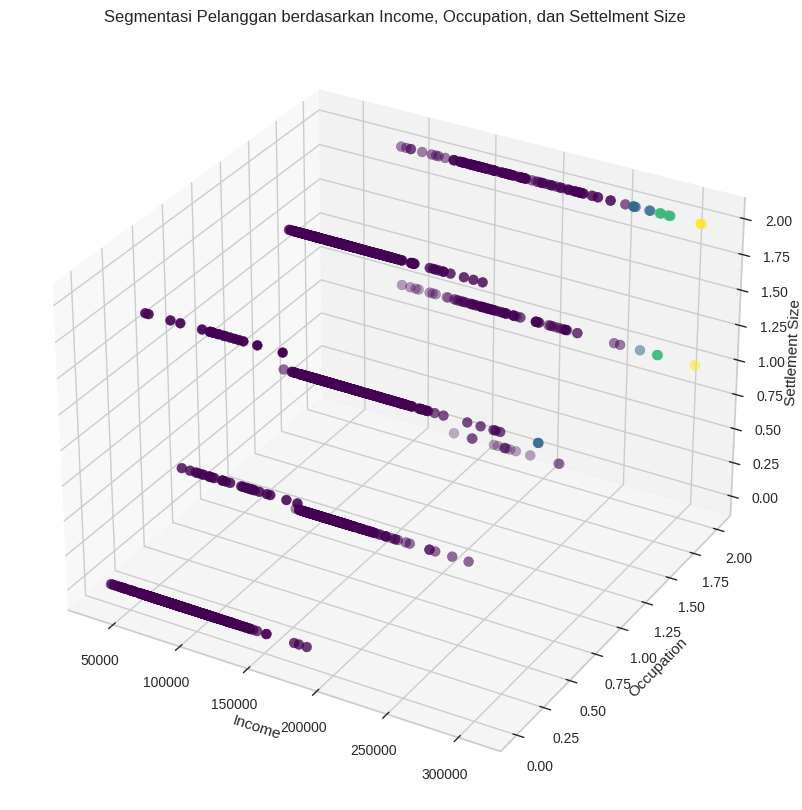

Silhouette Score Agglomerative: 0.704


In [33]:
fig3d = plt.figure(figsize=(10,10))
ax = fig3d.add_subplot(111, projection='3d')
ax.scatter(X_all['income'], X_all['occupation'], X_all['settlement_size'], cmap='viridis', c=AGG_clusters, s=50)

plt.title('Segmentasi Pelanggan berdasarkan Income, Occupation, dan Settelment Size')
ax.set_xlabel('Income')
ax.set_ylabel('Occupation')
ax.set_zlabel('Settlement Size')
plt.show()

print("Silhouette Score Agglomerative: %0.3f" % silhouette_score(X_all, AGG_clusters))

1. Berapakah jumlah klaster yang optimal untuk dataset tersebut?

Jawab : 

2. Model klasterisasi apa yang paling cocok digunakan untuk kasus tersebut?

Jawab : 
